In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [42]:
import os

# Define the file paths
true_file_path = "/content/True.csv"
fake_file_path = "/content/Fake.csv"

# Read the datasets
true_df = pd.read_csv(true_file_path)
fake_df = pd.read_csv(fake_file_path)

# Inspect the True News dataset
print("True News Dataset:")
print(true_df.head())
print(true_df.info())


True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Dat

In [43]:
# Inspect the Fake News dataset
print("\nFake News Dataset:")
print(fake_df.head())
print(fake_df.info())


Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column 

In [44]:
# Check for null values
print("Null Values in True News Dataset:")
print(true_df.isnull().sum())

print("\nNull Values in Fake News Dataset:")
print(fake_df.isnull().sum())

Null Values in True News Dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Null Values in Fake News Dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [45]:
# Check for duplicate rows
print("Duplicate Rows in True News Dataset:", true_df.duplicated().sum())
print("Duplicate Rows in Fake News Dataset:", fake_df.duplicated().sum())

Duplicate Rows in True News Dataset: 206
Duplicate Rows in Fake News Dataset: 3


In [46]:
# Remove duplicate rows
true_df = true_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()
print("\nDuplicates removed. Remaining rows:")
print("True News:", len(true_df))
print("Fake News:", len(fake_df))


Duplicates removed. Remaining rows:
True News: 21211
Fake News: 23478


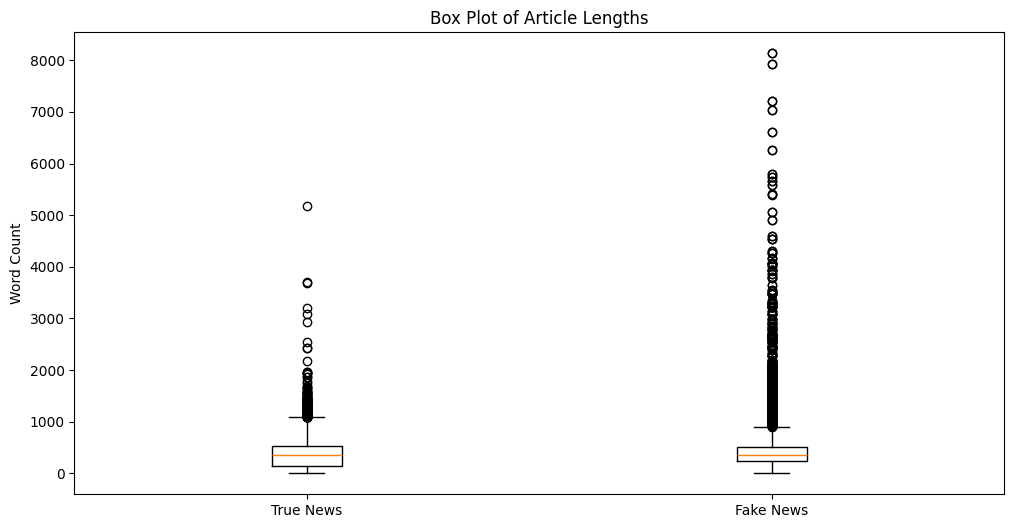

In [47]:
# Function to calculate article lengths
true_df['article_length'] = true_df['text'].apply(lambda x: len(x.split()))
fake_df['article_length'] = fake_df['text'].apply(lambda x: len(x.split()))

# Box plot for article lengths
plt.figure(figsize=(12, 6))
plt.boxplot([true_df['article_length'], fake_df['article_length']], labels=['True News', 'Fake News'])
plt.title('Box Plot of Article Lengths')
plt.ylabel('Word Count')
plt.show()

In [48]:
# Remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to datasets
true_df = remove_outliers(true_df, 'article_length')
fake_df = remove_outliers(fake_df, 'article_length')

print("After Outlier Removal:")
print("True News:", len(true_df))
print("Fake News:", len(fake_df))

After Outlier Removal:
True News: 20876
Fake News: 22255


In [49]:
# Combine both datasets and create a label column
true_df['label'] = 1  # Real news
fake_df['label'] = 0  # Fake news
# Concatenate both datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

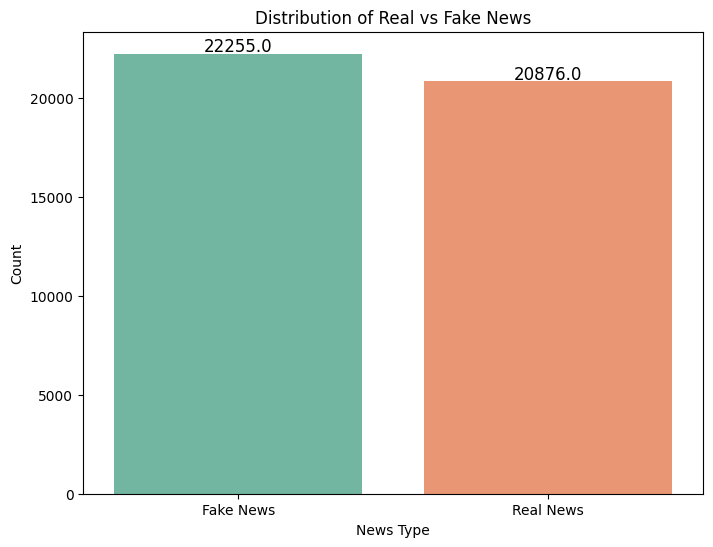

In [50]:
# Plot distribution with count labels on bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, palette='Set2')

# Adding counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set title and labels
plt.title('Distribution of Real vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake News', 'Real News'])

# Display the plot
plt.show()

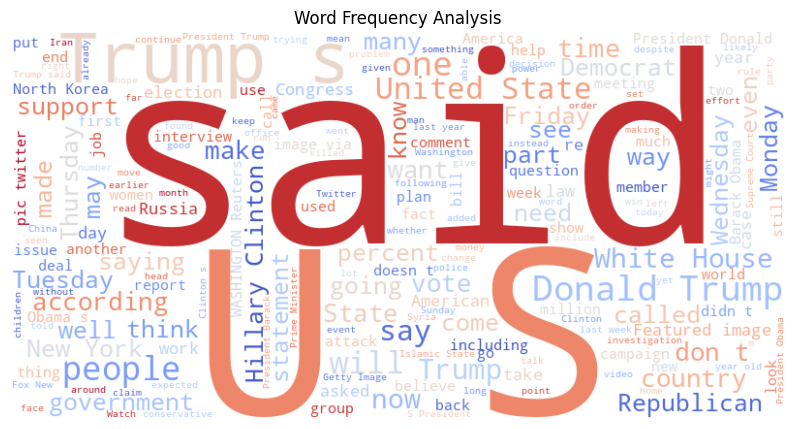

In [51]:
from wordcloud import WordCloud

# Combine both datasets' text for word cloud generation
text_data = ' '.join(df['text'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis')
plt.show()


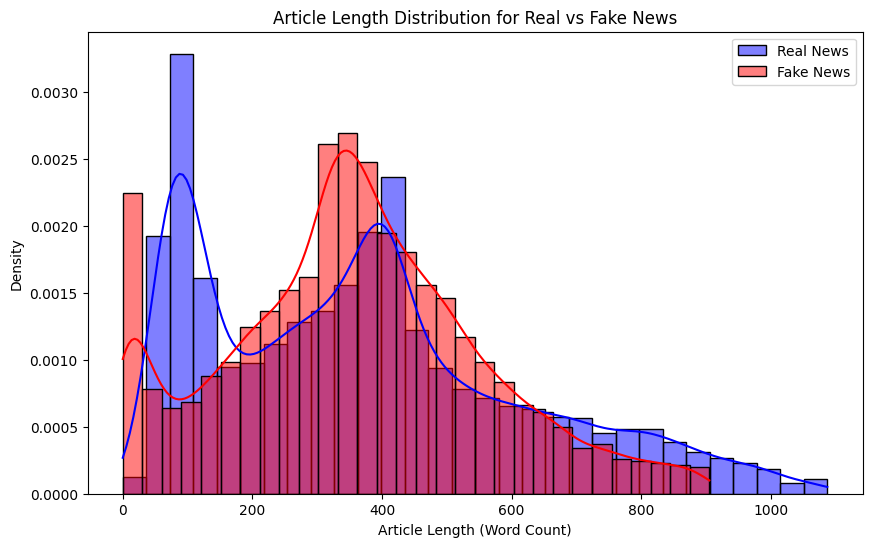

In [52]:
# Calculate article length (word count) for both datasets
true_df['article_length'] = true_df['text'].apply(lambda x: len(x.split()))
fake_df['article_length'] = fake_df['text'].apply(lambda x: len(x.split()))

# Plot article length distribution
plt.figure(figsize=(10, 6))
sns.histplot(true_df['article_length'], kde=True, color='blue', label='Real News', stat='density', bins=30)
sns.histplot(fake_df['article_length'], kde=True, color='red', label='Fake News', stat='density', bins=30)
plt.title('Article Length Distribution for Real vs Fake News')
plt.xlabel('Article Length (Word Count)')
plt.ylabel('Density')
plt.legend()
plt.show()


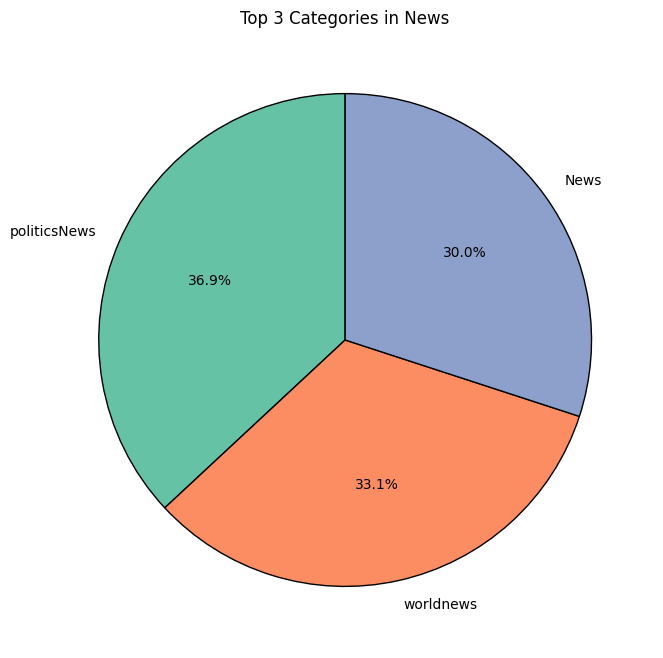

In [53]:
# Top 3 categories based on article count
top_categories = df['subject'].value_counts().head(3)

# Plot pie chart
plt.figure(figsize=(8, 8))
top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2", len(top_categories)), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Top 3 Categories in News')
plt.ylabel('')
plt.show()


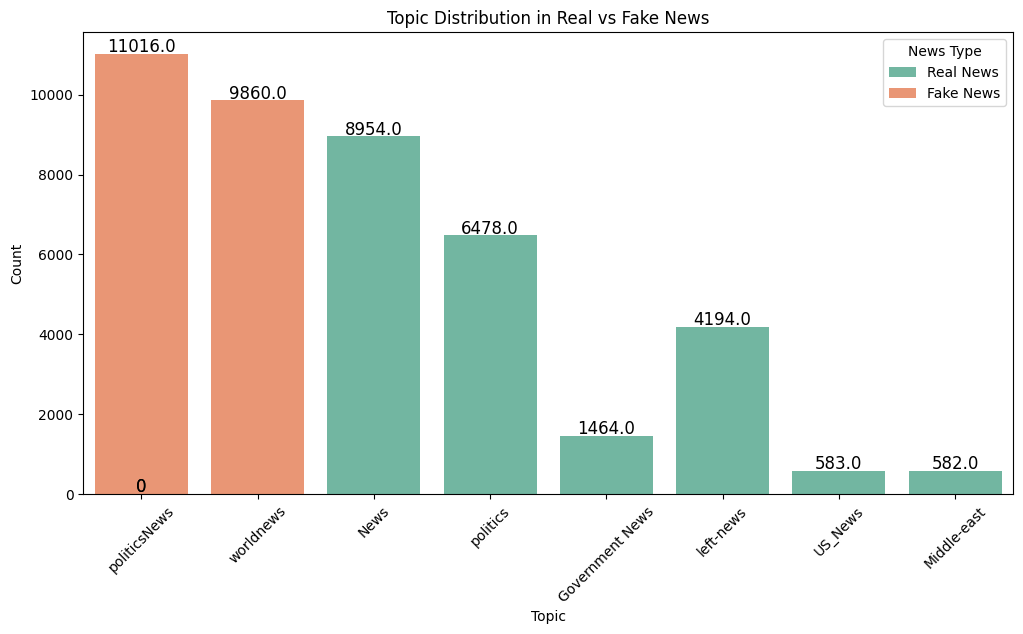

In [54]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='subject', hue='label', data=df, palette='Set2')
plt.title('Topic Distribution in Real vs Fake News')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Update the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Real News', 'Fake News']  # Change labels to represent real and fake news
ax.legend(handles, labels, title='News Type')

plt.show()


# **Feature Engineering**

In [55]:
# Split data into features and target
X = df['text']
y = df['label']
# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# **Train-test split**

In [56]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Logistic Regression Model**

In [57]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4448
           1       0.99      0.99      0.99      4179

    accuracy                           0.99      8627
   macro avg       0.99      0.99      0.99      8627
weighted avg       0.99      0.99      0.99      8627



# **Random Forest Model**

In [58]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4448
           1       1.00      1.00      1.00      4179

    accuracy                           1.00      8627
   macro avg       1.00      1.00      1.00      8627
weighted avg       1.00      1.00      1.00      8627



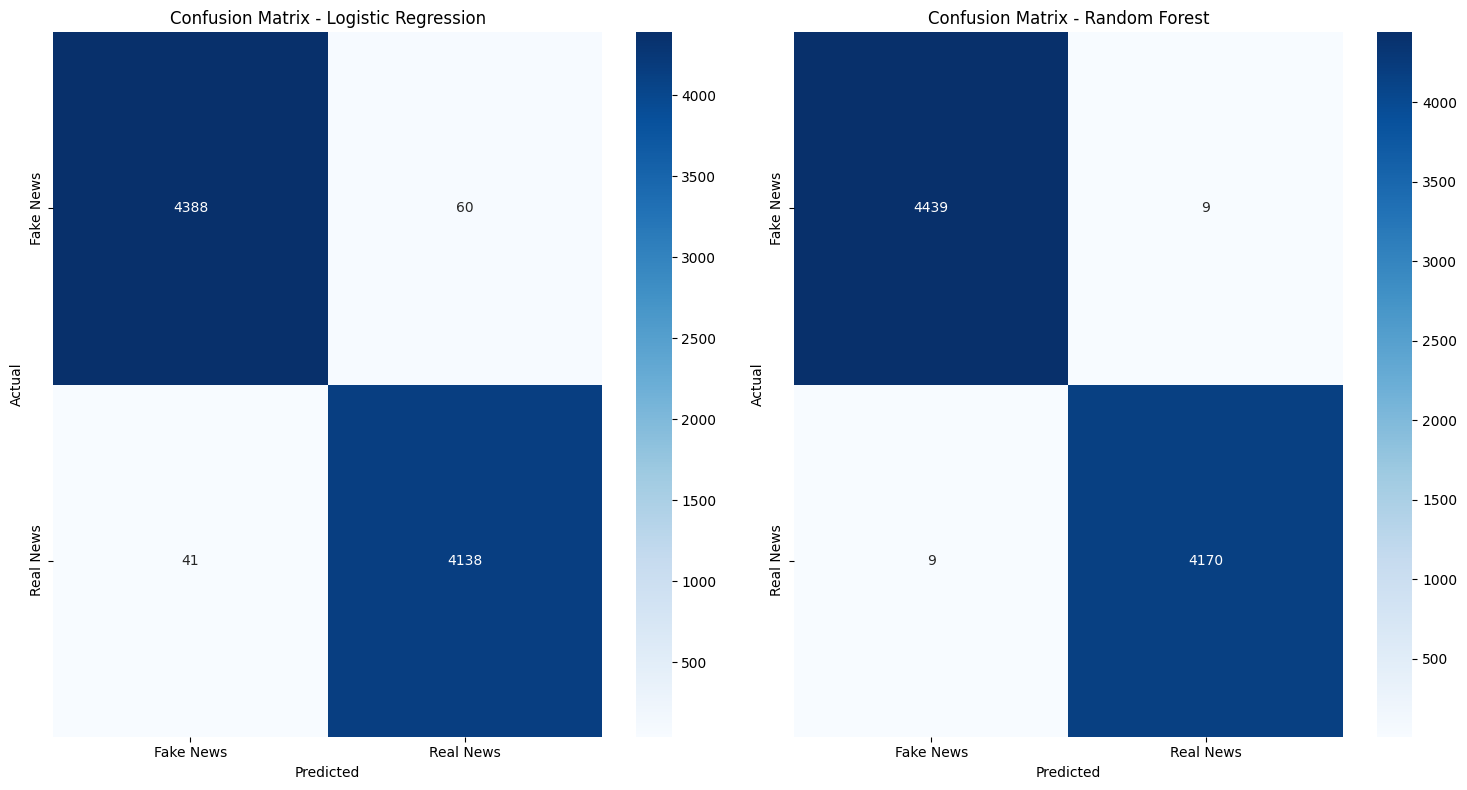

In [59]:
# Plot confusion matrix for both models in a single plot
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake News', 'Real News'], yticklabels=['Fake News', 'Real News'], ax=ax[0])
ax[0].set_title('Confusion Matrix - Logistic Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake News', 'Real News'], yticklabels=['Fake News', 'Real News'], ax=ax[1])
ax[1].set_title('Confusion Matrix - Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

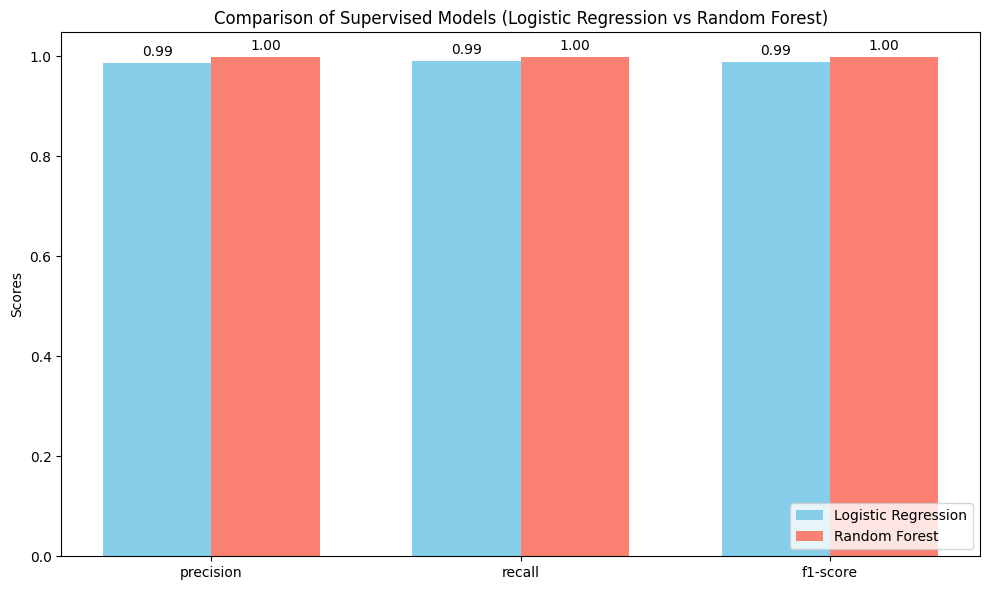

In [60]:
# Get classification reports for both models
lr_report = classification_report(y_test, y_pred, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract the necessary metrics for comparison
metrics = ['precision', 'recall', 'f1-score']
lr_values = [lr_report['1'][metric] for metric in metrics]
rf_values = [rf_report['1'][metric] for metric in metrics]

# Create a bar plot for comparison
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_values, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='salmon')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Supervised Models (Logistic Regression vs Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
# Move the legend to the bottom right
ax.legend(loc='lower right', bbox_to_anchor=(1, 0))
# Add values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)

# Show the plot
plt.tight_layout()
plt.show()


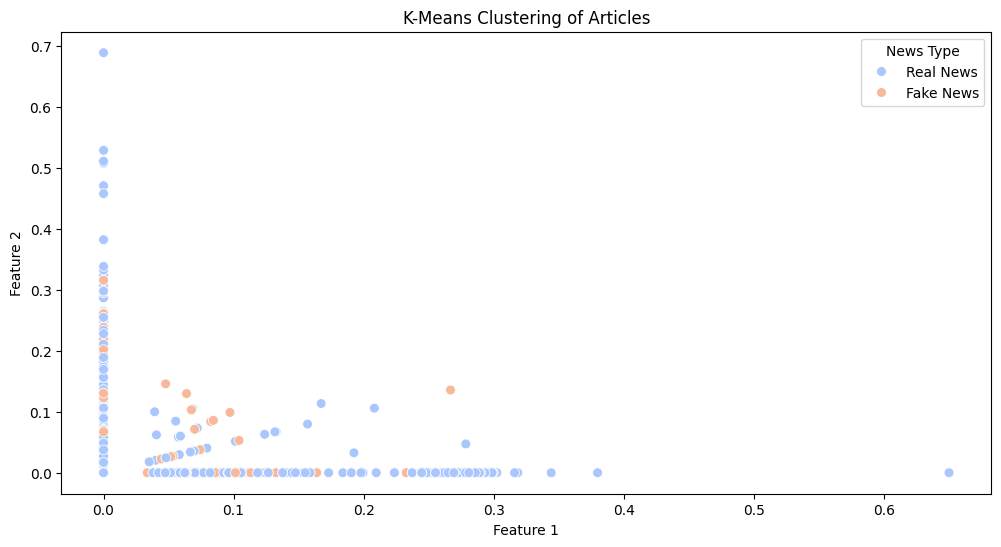

In [61]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_tfidf)
kmeans_labels = kmeans.labels_

# Plot K-Means Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_tfidf[:, 0].toarray().flatten(), y=X_tfidf[:, 1].toarray().flatten(), hue=kmeans_labels, palette='coolwarm', s=50)

# Set plot t
plt.title('K-Means Clustering of Articles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Real News', 'Fake News']
plt.legend(handles, labels, title='News Type')
# Display the plot
plt.show()
